In [2]:
from PIL import Image
import numpy as np
from PIL import ImageChops
from PIL import ImageStat as stat
import matplotlib.pyplot as plt

In [4]:
def porownaj_obrazy(image1 :Image, image2: Image):
    im1_tab = np.asarray(image1)
    im2_tab = np.asarray(image2)
    
    im1_stat = stat.Stat(image1)
    im2_stat = stat.Stat(image2)
    difference = {
        'mode':(image1.mode == image2.mode),
        'size': (image1.size == image2.size),
        'format':(image1.format == image2.format),
        'extrema':(im1_stat.extrema == im2_stat.extrema),
        'count':(im1_stat.count == im2_stat.count),
        'mean':(im1_stat.mean == im2_stat.mean),
        'median':(im1_stat.median == im2_stat.median),
        'stddev':(im1_stat.stddev == im2_stat.stddev),
        'ImageChops': (ImageChops.difference(image1,image2)),
        'typ danych tablicy':(im1_tab.dtype == im2_tab.dtype),
        'rozmiar tablicy':(im1_tab.shape == im2_tab.shape),
        'liczba elementow':(im1_tab.size == im2_tab.size),
        'wymiar tablicy':(im1_tab.ndim == im2_tab.ndim),  
    }
    return difference
    
im1 = Image.open('obraz6.jpg')
im2 = Image.open('obraz7.jpg')
difference = porownaj_obrazy(im1, im2)

difference

{'mode': True,
 'size': False,
 'format': True,
 'extrema': False,
 'count': False,
 'mean': False,
 'median': False,
 'stddev': False,
 'ImageChops': <PIL.Image.Image image mode=RGB size=403x491>,
 'typ danych tablicy': True,
 'rozmiar tablicy': False,
 'liczba elementow': False,
 'wymiar tablicy': True}

# Zad 2

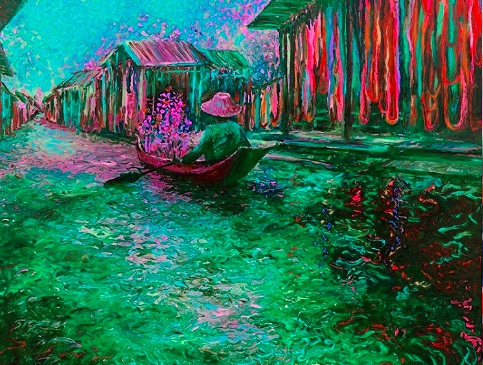

In [5]:
mix212 = Image.open('mix212.png')
mix212

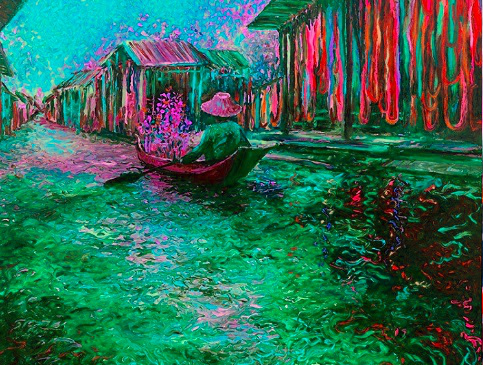

In [6]:
obraz12 = Image.open('obraz12.jpg')

r, g, b = obraz12.split()

obraz12_merge = Image.merge('RGB', (r, b, g))
obraz12_merge

# Zad 3

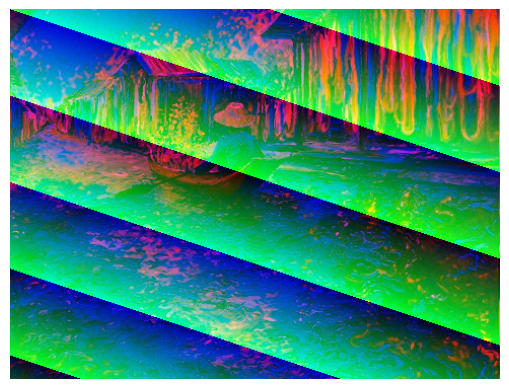

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def szary(w, h):
    table = np.fromfunction(lambda i, j: (3 * i - j) % 256, (h, w), dtype=int)
    result = Image.fromarray(table.astype(np.uint8))
    return result

image = Image.open('obraz12.jpg')
w, h = image.size

image_szare = szary(w, h)

# Konwersja obrazów do formatu numpy
table = np.array(image)
table_szare = np.array(image_szare)

table[:, :, 1] = table_szare

image_mix = Image.fromarray(table)
image_mix.save('mix.png')

plt.imshow(image_mix)
plt.axis('off')
plt.show()


# Zad 4

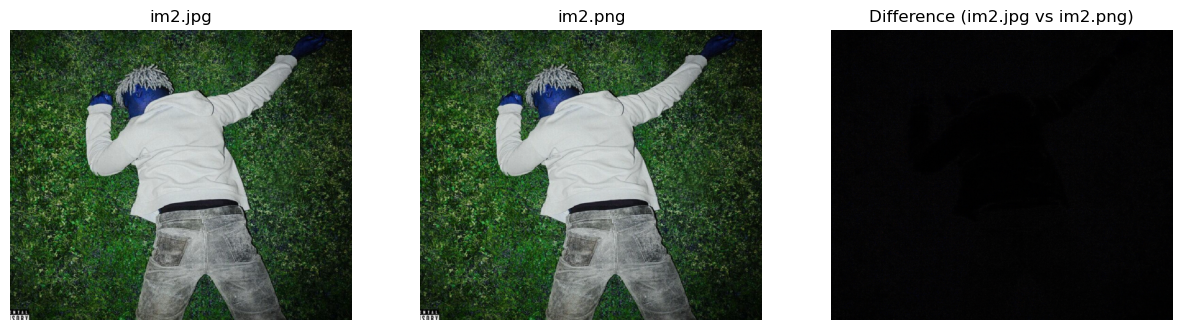

In [22]:
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

my_image = Image.open('my_image.png').convert("RGB")

r, g, b = my_image.split()

im2 = Image.merge("RGB", (b, g, r))

im2.save('im2.jpg', format='JPEG')
im2.save('im2.png', format='PNG')

im2_jpg = Image.open('im2.jpg').convert("RGB")
im2_png = Image.open('im2.png').convert("RGB")

difference = ImageChops.difference(im2_jpg, im2_png)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(im2_jpg)
axs[0].set_title("im2.jpg")
axs[0].axis('off')

axs[1].imshow(im2_png)
axs[1].set_title("im2.png")
axs[1].axis('off')

axs[2].imshow(difference)
axs[2].set_title("Difference (im2.jpg vs im2.png)")
axs[2].axis('off')

fig2_path = 'fig2.png'
plt.savefig(fig2_path)
plt.show()

In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open("obraz11.jpg")

blue_channel = np.array(image.convert("RGB"))[:, :, 2]

pixels_with_blue_50 = np.sum(blue_channel == 50)

plt.figure(figsize=(10, 5))
plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.7)
plt.title("Histogram of the Blue Channel")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.savefig("hist.png")
plt.close()

pixels_with_blue_50, histogram_path


(1375, 'hist.png')

In [32]:
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

im = Image.open("my_image.png")

t_r, t_g, t_b, t_a = im.split()

im_r = t_r.copy()
im_g = t_g.copy()
im_b = t_b.copy()

im1 = Image.merge("RGB", (im_r, im_g, im_b))

im_rgb = im.convert("RGB")

difference = ImageChops.difference(im_rgb, im1)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(im_rgb)
axes[0].set_title("Original Image (im, RGB)")
axes[0].axis("off")

axes[1].imshow(im1)
axes[1].set_title("Re-merged Image (im1)")
axes[1].axis("off")

axes[2].imshow(difference)
axes[2].set_title("Difference (im - im1)")
axes[2].axis("off")

fig_path = "fig1.png"
plt.savefig(fig_path)
plt.close()

im_r.save("im_r.png")
im_g.save("im_g.png")
im_b.save("im_b.png")



In [33]:
obraz11 = Image.open('obraz11.jpg')
obraz11_stat = stat.Stat(obraz11)
obraz11_stat.mean

[154.45950334732478, 112.68527509165294, 89.93171523829764]